<a href="https://colab.research.google.com/github/Bmdhia/Chicago-Crime/blob/main/Workflow_Prep_Chicago_Crime_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV.
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download.
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [2]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):


    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")

    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))

    # If more than
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]

    elif len(crime_files)>1:
        print('[i] The following files were found:')

        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


[!] Could not programmatically find your downloads folder.
- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.


<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

In [3]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = r"/content/Crimes_-_2001_to_Present.csv"

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

In [4]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")

RAW_FILE

'/content/Crimes_-_2001_to_Present.csv'

In [5]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [6]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39426,13255306,JG477815,10/25/2023 09:35:00 AM,065XX S DR MARTIN LUTHER KING JR DR,0462,BATTERY,"AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, ...",CHA APARTMENT,True,False,...,20.0,69.0,04B,1180043.0,1861837.0,2023,11/02/2023 03:40:47 PM,41.776150,-87.615523,"(41.776150283, -87.615522623)"
39427,13255921,JG478590,10/25/2023 07:25:00 PM,027XX W ROOSEVELT RD,0460,BATTERY,SIMPLE,OTHER (SPECIFY),False,False,...,28.0,29.0,08B,1158071.0,1894595.0,2023,11/02/2023 03:40:47 PM,41.866517,-87.695179,"(41.866517317, -87.695178701)"
39428,13259180,JG481769,10/25/2023 11:58:00 AM,046XX W IRVING PARK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,...,45.0,15.0,06,1144295.0,1926174.0,2023,11/02/2023 03:40:47 PM,41.953443,-87.744957,"(41.953443342, -87.744957048)"
39429,13256888,JG479904,10/26/2023 12:00:00 AM,073XX S ROCKWELL ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,18.0,66.0,14,1160318.0,1855698.0,2023,11/02/2023 03:40:47 PM,41.759733,-87.688002,"(41.759733023, -87.68800204)"


In [7]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
29700,13246664,JG467702,01/01/2001 12:00:00 AM,045XX N CENTRAL PARK AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,14.0,02,NaN,NaN,2001,10/21/2023 03:42:03 PM,NaN,NaN,NaN,2001-01-01 12:00:00
37272,1380036,G091296,02/14/2001 01:07:01 AM,051XX S KARLOV AV,0820,THEFT,$500 AND UNDER,OTHER,False,False,...,NaN,06,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-02-14 01:07:01
3358,1387435,G098599,02/17/2001 06:15:00 PM,012XX S LAKE SHORE DR,031A,ROBBERY,ARMED: HANDGUN,OTHER,True,False,...,NaN,03,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-02-17 06:15:00
26571,1392129,G104861,02/21/2001 07:05:00 AM,023XX W POTOMAC AV,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-02-21 07:05:00
27537,1415642,G118224,02/28/2001 07:22:14 PM,0000X W 24 ST,2027,NARCOTICS,POSS: CRACK,STREET,True,False,...,NaN,18,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-02-28 07:22:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34285,13280725,JG506680,11/12/2023 12:00:00 AM,004XX N MICHIGAN AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,...,8.0,11,1177329.0,1903108.0,2023,11/19/2023 03:41:26 PM,41.889463,-87.624223,"(41.88946287, -87.624222942)",2023-11-12 12:00:00
32635,13277443,JG504432,11/12/2023 12:00:00 AM,041XX N RICHMOND ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,16.0,02,1155974.0,1927424.0,2023,11/19/2023 03:41:26 PM,41.956645,-87.701990,"(41.95664537, -87.701989912)",2023-11-12 12:00:00
28014,13274915,JG501496,11/12/2023 12:00:00 AM,011XX W WASHBURNE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,28.0,14,1168906.0,1894549.0,2023,11/19/2023 03:41:26 PM,41.866163,-87.655404,"(41.86616318, -87.655403759)",2023-11-12 12:00:00
31888,13275599,JG502244,11/12/2023 12:30:00 AM,040XX S LAKE PARK AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,36.0,07,1183616.0,1878516.0,2023,11/20/2023 03:41:07 PM,41.821836,-87.601904,"(41.821836221, -87.601904135)",2023-11-12 12:30:00


## Separate the Full Dataset by Years

In [8]:
chicago_full['Datetime'].dt.year

29700    2001
37272    2001
3358     2001
26571    2001
27537    2001
         ... 
34285    2023
32635    2023
28014    2023
31888    2023
31890    2023
Name: Datetime, Length: 39431, dtype: int64

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2023    38407
2022      320
2021      183
2020       68
2019       65
2014       50
2018       50
2015       41
2005       30
2017       28
2016       28
2002       25
2001       23
2009       16
2013       15
2011       15
2004       14
2012       14
2010       12
2008       11
2007        6
2003        6
2006        4
Name: Year, dtype: int64

In [10]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 12:00:00,13246664,01/01/2001 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1723,17,33.0,2001,NaN,NaN
2001-02-14 01:07:01,1380036,02/14/2001 01:07:01 AM,THEFT,$500 AND UNDER,OTHER,False,False,815,8,NaN,2001,NaN,NaN
2001-02-17 06:15:00,1387435,02/17/2001 06:15:00 PM,ROBBERY,ARMED: HANDGUN,OTHER,True,False,133,1,NaN,2001,NaN,NaN
2001-02-21 07:05:00,1392129,02/21/2001 07:05:00 AM,BATTERY,SIMPLE,SIDEWALK,False,False,1424,14,NaN,2001,NaN,NaN
2001-02-28 07:22:14,1415642,02/28/2001 07:22:14 PM,NARCOTICS,POSS: CRACK,STREET,True,False,2113,2,NaN,2001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-12 12:00:00,13280725,11/12/2023 12:00:00 AM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,1834,18,42.0,2023,41.889463,-87.624223
2023-11-12 12:00:00,13277443,11/12/2023 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1724,17,33.0,2023,41.956645,-87.701990
2023-11-12 12:00:00,13274915,11/12/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1232,12,28.0,2023,41.866163,-87.655404


In [12]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [13]:
FINAL_DROP = ['Year']

In [14]:
## set save location

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:

    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [15]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [16]:
## create a README.txt for the zip files
readme = """Source URL:
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [17]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,13246664,01/01/2001 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1723,17,33.0,NaN,NaN
1,1380036,02/14/2001 01:07:01 AM,THEFT,$500 AND UNDER,OTHER,False,False,815,8,NaN,NaN,NaN
2,1387435,02/17/2001 06:15:00 PM,ROBBERY,ARMED: HANDGUN,OTHER,True,False,133,1,NaN,NaN,NaN
3,1392129,02/21/2001 07:05:00 AM,BATTERY,SIMPLE,SIDEWALK,False,False,1424,14,NaN,NaN,NaN
4,1415642,02/28/2001 07:22:14 PM,NARCOTICS,POSS: CRACK,STREET,True,False,2113,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
0,13243294,01/01/2023 01:00:00 AM,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1834,18,2.0,41.895003,-87.621528
1,13234638,01/01/2023 01:25:00 PM,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,RESIDENCE,False,True,2413,24,50.0,41.994641,-87.688566
2,12938558,01/01/2023 05:00:00 AM,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",APARTMENT,False,True,812,8,13.0,41.775022,-87.777280
3,13255273,01/01/2023 05:00:00 PM,DECEPTIVE PRACTICE,FORGERY,CHA APARTMENT,False,False,1232,12,28.0,41.864161,-87.650957


In [18]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    5
2002    5
2003    5
2004    5
2005    5
2006    4
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2022    5
2023    5
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files.
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

In [36]:
dis = df['District'].value_counts()

In [37]:
dis.index[0]

8

In [38]:
dis.index[-1]

16

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    114 non-null    int64  
 1   Date                  114 non-null    object 
 2   Primary Type          114 non-null    object 
 3   Description           114 non-null    object 
 4   Location Description  104 non-null    object 
 5   Arrest                114 non-null    bool   
 6   Domestic              114 non-null    bool   
 7   Beat                  114 non-null    int64  
 8   District              114 non-null    int64  
 9   Ward                  107 non-null    float64
 10  Latitude              38 non-null     float64
 11  Longitude             38 non-null     float64
dtypes: bool(2), float64(3), int64(3), object(4)
memory usage: 10.0+ KB


In [41]:
df['Date'] = pd.to_datetime(df["Date"])

In [42]:
ts = df.set_index('Date')

In [45]:
ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:00:00,13246664,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1723,17,33.0,NaN,NaN
2001-02-14 01:07:01,1380036,THEFT,$500 AND UNDER,OTHER,False,False,815,8,NaN,NaN,NaN
2001-02-17 18:15:00,1387435,ROBBERY,ARMED: HANDGUN,OTHER,True,False,133,1,NaN,NaN,NaN
2001-02-21 07:05:00,1392129,BATTERY,SIMPLE,SIDEWALK,False,False,1424,14,NaN,NaN,NaN
2001-02-28 19:22:14,1415642,NARCOTICS,POSS: CRACK,STREET,True,False,2113,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 01:00:00,13243294,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1834,18,2.0,41.895003,-87.621528
2023-01-01 13:25:00,13234638,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,RESIDENCE,False,True,2413,24,50.0,41.994641,-87.688566
2023-01-01 05:00:00,12938558,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",APARTMENT,False,True,812,8,13.0,41.775022,-87.777280


In [57]:
ts['Primary Type'].value_counts()

DECEPTIVE PRACTICE            25
OFFENSE INVOLVING CHILDREN    23
ROBBERY                       14
THEFT                         11
CRIMINAL SEXUAL ASSAULT       10
SEX OFFENSE                    9
BATTERY                        7
BURGLARY                       4
ASSAULT                        3
NARCOTICS                      2
CRIMINAL DAMAGE                2
OTHER OFFENSE                  2
CRIM SEXUAL ASSAULT            1
CRIMINAL TRESPASS              1
Name: Primary Type, dtype: int64

In [61]:
years = ts.resample("Y").sum()

<ipython-input-61-a3d4c91130fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  years = ts.resample("Y").sum()


In [62]:
years

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,
2001-12-31,18821906,2,0,6208,42,33.0,0.000000,0.000000
2002-12-31,43363336,3,2,8181,81,66.0,0.000000,0.000000
2003-12-31,24504862,2,1,6133,60,118.0,0.000000,0.000000
2004-12-31,16132698,0,1,5301,52,82.0,83.630668,-175.400264
2005-12-31,28568860,1,2,3320,32,70.0,83.403283,-175.205049
2006-12-31,30233075,0,0,3457,34,79.0,41.792012,-87.798229
2007-12-31,53197731,1,1,4328,42,85.0,0.000000,0.000000
2008-12-31,37559685,0,1,5496,53,117.0,41.769123,-87.688260
2009-12-31,40098539,2,1,4639,45,65.0,83.663754,-175.362922


In [69]:
years.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2001-12-31 to 2023-12-31
Freq: A-DEC
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         23 non-null     int64  
 1   Arrest     23 non-null     int64  
 2   Domestic   23 non-null     int64  
 3   Beat       23 non-null     int64  
 4   District   23 non-null     int64  
 5   Ward       23 non-null     float64
 6   Latitude   23 non-null     float64
 7   Longitude  23 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.6 KB


<Axes: xlabel='Date'>

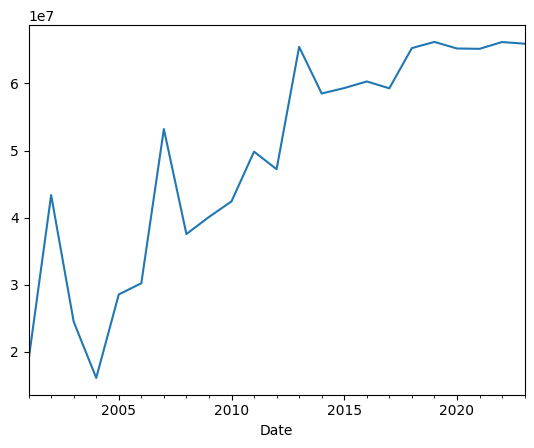

In [63]:
years['ID'].plot()

In [86]:
ts = ts[~ts.index.duplicated()]

In [137]:
tawtaw = ts[['Primary Type']]

In [145]:
titi = tawtaw.resample("Y").size()

<Axes: xlabel='Date'>

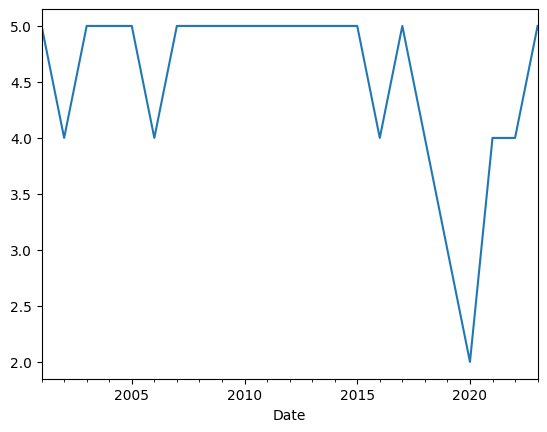

In [146]:
titi.plot()

In [139]:
tawtaw.plot()

TypeError: ignored

In [148]:
tawa = ts.groupby('Primary Type').resample("Y").size()
#tawa = tawa.reset_index(name='Total Crimes')
tawa

Primary Type  Date      
ASSAULT       2003-12-31    2
              2004-12-31    0
              2005-12-31    0
              2006-12-31    0
              2007-12-31    0
                           ..
THEFT         2005-12-31    0
              2006-12-31    2
              2007-12-31    1
              2008-12-31    1
              2009-12-31    1
Length: 169, dtype: int64

In [151]:
cri = tawa.unstack(0)

NameError: ignored

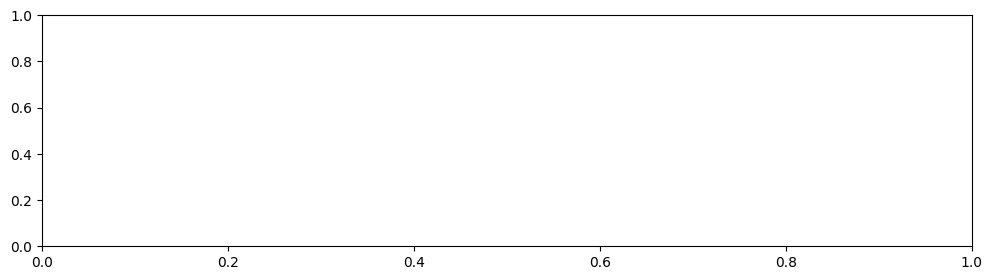

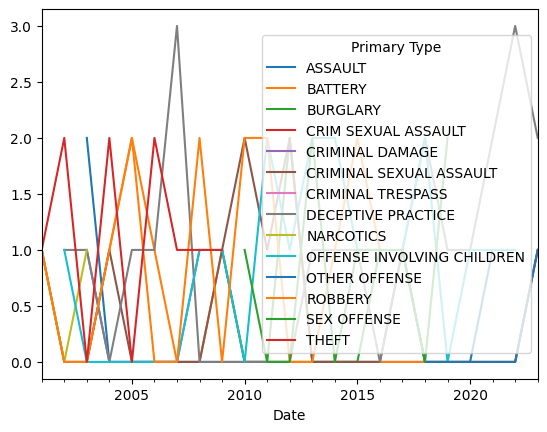

In [158]:

fig = plt.subplots(figsize=(12,3))
cri.plot()
legend(bbox_to_anchor=[1,1]);

In [153]:
ts_W = ts.resample("W").last()
ts_W

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-07,13246664.0,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,0.0,0.0,1723.0,17.0,33.0,NaN,NaN
2001-01-14,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-21,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-28,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-04,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-11,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-18,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Primary Type,Date'>

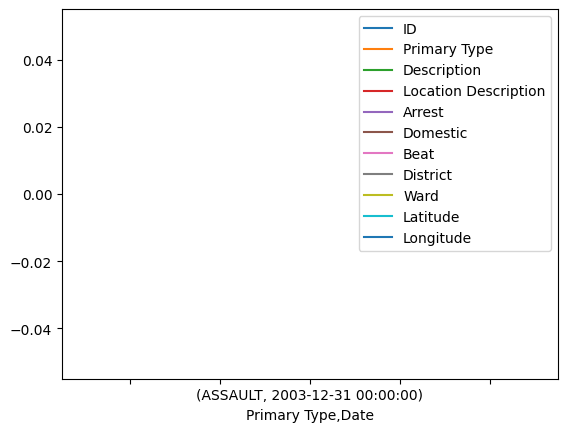

In [130]:
tawa.plot()

In [113]:
o = ts.resample("Y").size()

c = ts.groupby('Primary Type').resample("Y").size().unstack()

In [114]:
c

Date,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,...,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31,2023-12-31
Primary Type,,,,,,,,,,,,,,,,,,,,,
ASSAULT,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
BATTERY,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
BURGLARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM SEXUAL ASSAULT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIMINAL DAMAGE,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIMINAL SEXUAL ASSAULT,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
CRIMINAL TRESPASS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DECEPTIVE PRACTICE,NaN,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0
NARCOTICS,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
import matplotlib.pyplot as plt

In [68]:
## make a ts that is resampled to correct freq
ms = ts.resample("Y").size()
ms

Date
2001-12-31    5
2002-12-31    5
2003-12-31    5
2004-12-31    5
2005-12-31    5
2006-12-31    4
2007-12-31    5
2008-12-31    5
2009-12-31    5
2010-12-31    5
2011-12-31    5
2012-12-31    5
2013-12-31    5
2014-12-31    5
2015-12-31    5
2016-12-31    5
2017-12-31    5
2018-12-31    5
2019-12-31    5
2020-12-31    5
2021-12-31    5
2022-12-31    5
2023-12-31    5
Freq: A-DEC, dtype: int64

In [73]:
df[['Primary Type','Date']]

,Primary Type,Date
0,CRIMINAL SEXUAL ASSAULT,2001-01-01 00:00:00
1,THEFT,2001-02-14 01:07:01
2,ROBBERY,2001-02-17 18:15:00
3,BATTERY,2001-02-21 07:05:00
4,NARCOTICS,2001-02-28 19:22:14
...,...,...
0,CRIMINAL SEXUAL ASSAULT,2023-01-01 01:00:00
1,DECEPTIVE PRACTICE,2023-01-01 13:25:00
2,BATTERY,2023-01-01 05:00:00
3,DECEPTIVE PRACTICE,2023-01-01 17:00:00


In [79]:
df['Date'].dt.year

0    2001
1    2001
2    2001
3    2001
4    2001
     ... 
0    2023
1    2023
2    2023
3    2023
4    2023
Name: Date, Length: 114, dtype: int64

In [83]:
#ts['Year'] = ts.Date.dt.year
typeee = ts.groupby(['Date', 'Primary Type']).size()
yearrr = ts.groupby('Date').size()

<Axes: xlabel='Date'>

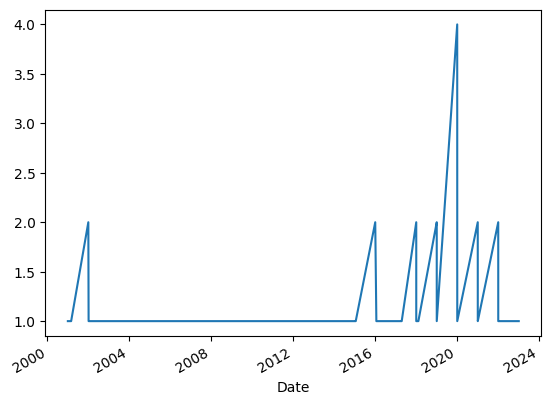

In [84]:
yearrr.plot()

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
import folium

In [127]:
ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:00:00,13246664,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1723,17,33.0,NaN,NaN
2001-02-14 01:07:01,1380036,THEFT,$500 AND UNDER,OTHER,False,False,815,8,NaN,NaN,NaN
2001-02-17 18:15:00,1387435,ROBBERY,ARMED: HANDGUN,OTHER,True,False,133,1,NaN,NaN,NaN
2001-02-21 07:05:00,1392129,BATTERY,SIMPLE,SIDEWALK,False,False,1424,14,NaN,NaN,NaN
2001-02-28 19:22:14,1415642,NARCOTICS,POSS: CRACK,STREET,True,False,2113,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 01:00:00,13243294,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1834,18,2.0,41.895003,-87.621528
2023-01-01 13:25:00,13234638,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,RESIDENCE,False,True,2413,24,50.0,41.994641,-87.688566
2023-01-01 05:00:00,12938558,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",APARTMENT,False,True,812,8,13.0,41.775022,-87.777280


In [167]:
AM = ts.between_time('07:00:00', '10:00:00')

In [165]:
AM

ID                                                      137269331
Primary Type    BATTERYDECEPTIVE PRACTICEDECEPTIVE PRACTICEDEC...
Description     SIMPLEFINANCIAL IDENTITY THEFT OVER $ 300FINAN...
Arrest                                                          2
Domestic                                                        5
Beat                                                        14930
District                                                      146
Ward                                                        204.0
Latitude                                               334.504608
Longitude                                             -701.092583
dtype: object

In [163]:
PM = ts.between_time('16:00:00', '19:00:00')

In [168]:
AM

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-02-21 07:05:00,1392129,BATTERY,SIMPLE,SIDEWALK,False,False,1424,14,NaN,NaN,NaN
2002-01-14 09:00:00,13277006,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,623,6,6.0,NaN,NaN
2005-01-11 09:30:00,13207522,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1122,11,28.0,NaN,NaN
2006-10-01 08:00:00,13233380,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,APARTMENT,False,False,421,4,7.0,NaN,NaN
2009-02-06 07:00:00,6740742,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,834,8,18.0,41.752593,-87.727965
2009-03-28 09:24:22,6840725,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,STREET,False,False,1814,18,2.0,41.911161,-87.634957
2010-04-29 10:00:00,7481578,ROBBERY,STRONG ARM - NO WEAPON,SIDEWALK,False,True,612,6,17.0,41.756057,-87.654929
2011-03-18 10:00:00,7989953,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,2213,22,19.0,41.720926,-87.667438
2012-01-26 07:00:00,8455665,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,123,1,34.0,41.871790,-87.633564


In [174]:
AM['ID'].count()

14

In [175]:
PM['ID'].count()

14

In [180]:
PM['Primary Type'].value_counts().head(5)

DECEPTIVE PRACTICE    4
THEFT                 3
ASSAULT               2
ROBBERY               1
CRIMINAL DAMAGE       1
Name: Primary Type, dtype: int64

In [182]:
AM['Primary Type'].value_counts().head(5)

DECEPTIVE PRACTICE         5
ROBBERY                    3
CRIMINAL SEXUAL ASSAULT    2
BATTERY                    1
BURGLARY                   1
Name: Primary Type, dtype: int64